<a href="https://colab.research.google.com/github/pratyashanayak/ML_projects/blob/main/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

np.random.seed(0)

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

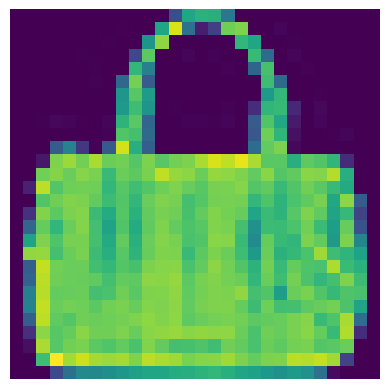

In [ ]:
plt.imshow(x_train[4000])
plt.axis('off')
plt.show()

In [ ]:
for i in range(0,10):
  print(i,':',len(x_train[y_train==i]))

0 : 6000
1 : 6000
2 : 6000
3 : 6000
4 : 6000
5 : 6000
6 : 6000
7 : 6000
8 : 6000
9 : 6000


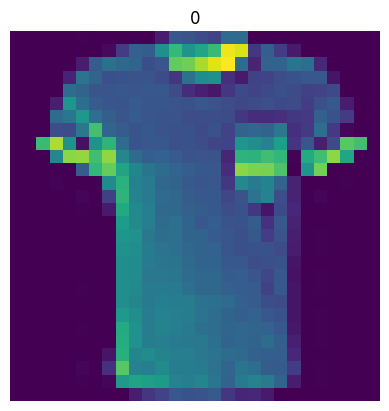

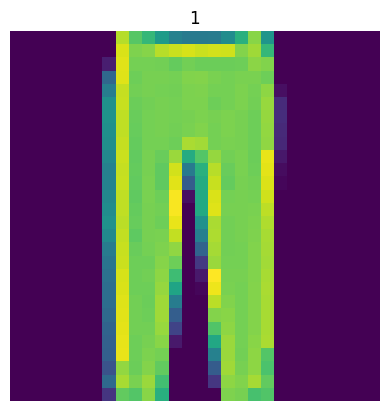

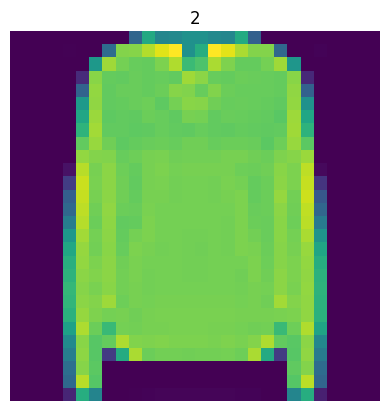

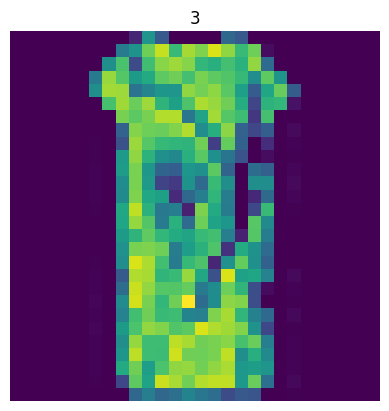

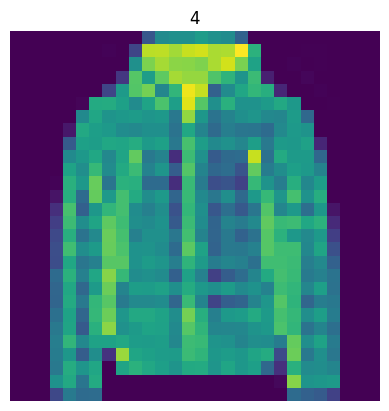

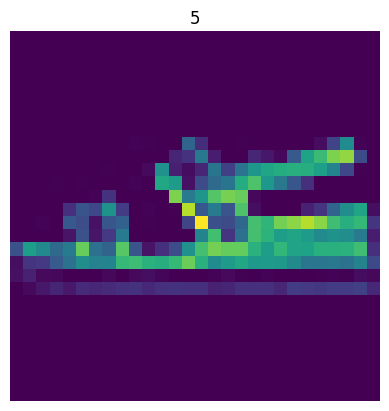

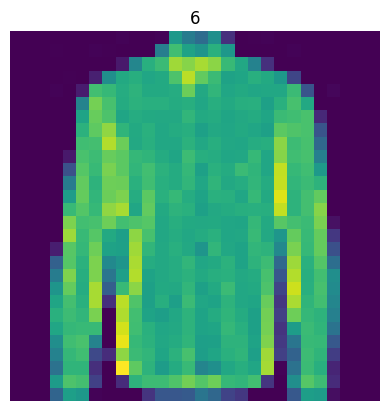

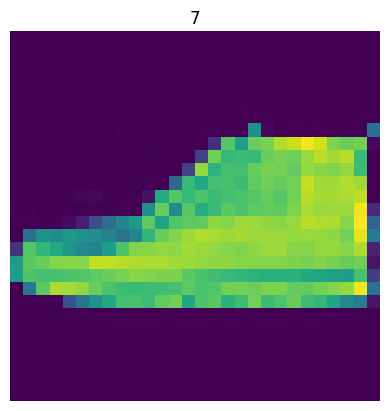

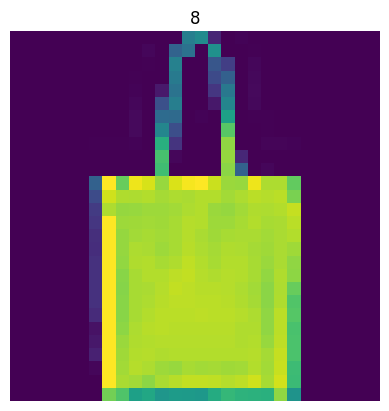

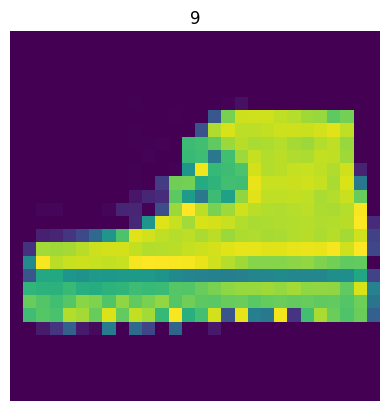

In [ ]:
for i in range(0,10):
  plt.imshow(x_train[y_train==i][np.random.randint(0,5000)])
  plt.title(str(i))
  plt.axis('off')
  plt.show()

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


Text(0.5, 1.0, 'Distribution of the training dataset')

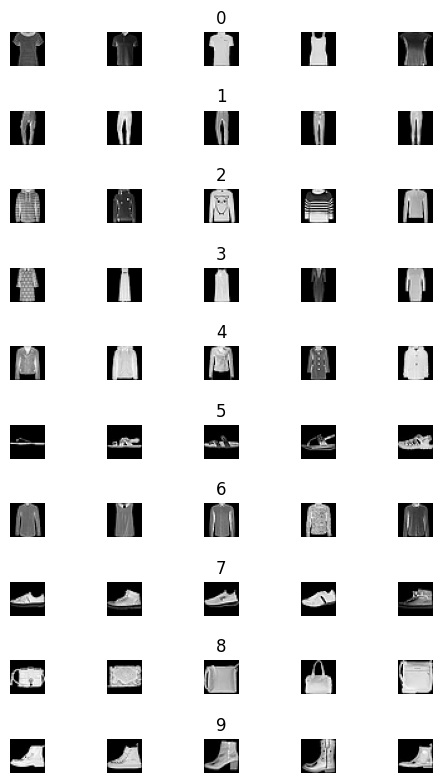

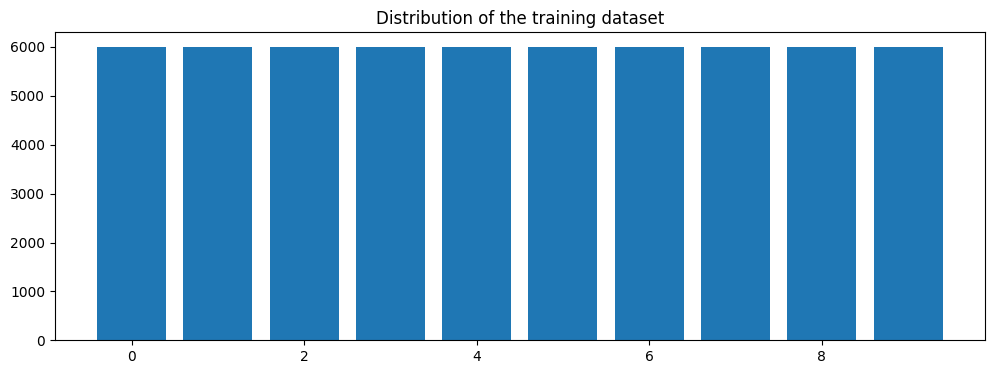

In [ ]:
num_of_samples=[]

cols=5
num_classes=10
fig, axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,8))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected=x_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1))], cmap=plt.get_cmap("gray"))
    axs[j][i].axis('off')
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [ ]:
def Lenet_model():
  model=Sequential()

  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  model.add(Dense(200,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
model=Lenet_model()

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs = 10, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 40s 289ms/step - loss: 0.6175 - accuracy: 0.7743 - val_loss: 0.3831 - val_accuracy: 0.8578
Epoch 2/10
135/135 [==============================] - 38s 281ms/step - loss: 0.3489 - accuracy: 0.8720 - val_loss: 0.3626 - val_accuracy: 0.8687
Epoch 3/10
135/135 [==============================] - 38s 281ms/step - loss: 0.3096 - accuracy: 0.8845 - val_loss: 0.3061 - val_accuracy: 0.8873
Epoch 4/10
135/135 [==============================] - 38s 284ms/step - loss: 0.2815 - accuracy: 0.8953 - val_loss: 0.3144 - val_accuracy: 0.8853
Epoch 5/10
135/135 [==============================] - 40s 296ms/step - loss: 0.2635 - accuracy: 0.9033 - val_loss: 0.2988 - val_accuracy: 0.8897
Epoch 6/10
135/135 [==============================] - 39s 291ms/step - loss: 0.2425 - accuracy: 0.9089 - val_loss: 0.2763 - val_accuracy: 0.9012
Epoch 7/10
135/135 [==============================] - 38s 281ms/step - loss: 0.2347 - accuracy: 0.9134 - val_loss: 0.2784 - val_ac

Text(0.5, 0, 'epoch')

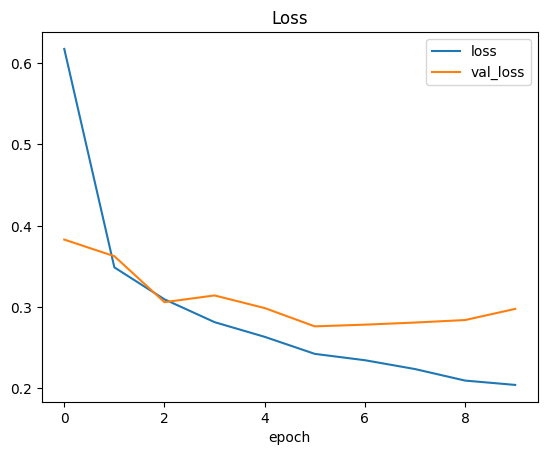

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

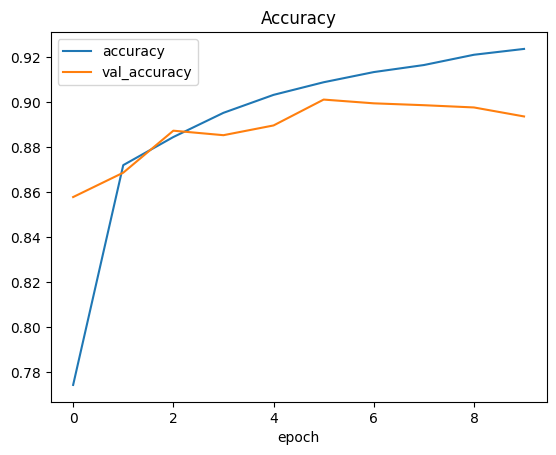

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
from google.colab import files
upload=files.upload()

Saving bag.jpg to bag.jpg


In [ ]:
d=list(upload.keys())[0]
print(d)

bag.jpg


[255 216 255 ...   3 255 217]


<ipython-input-20-59003df1124a>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


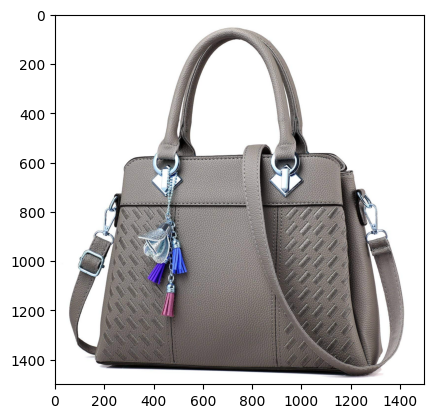

In [ ]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

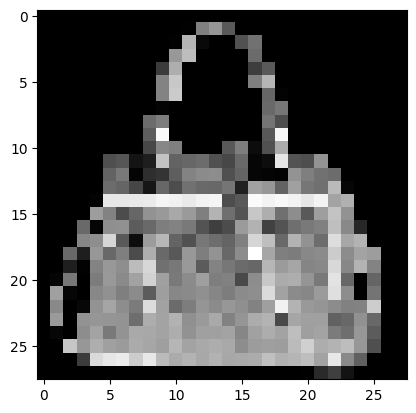

In [ ]:
img=cv2.resize(img,(28,28))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [ ]:
img=img/255
img=img.reshape(1,28,28,1)
prediction=model.predict(img)

1/1 [==============================] - 0s 104ms/step


In [ ]:
p=np.argmax(prediction,axis=1)

In [ ]:
p

array([8])

In [ ]:
print(str(p))

[8]
